In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
% matplotlib in line

UsageError: Line magic function `%` not found.


In [7]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic.shape

(891, 12)

<Axes: xlabel='Survived', ylabel='count'>

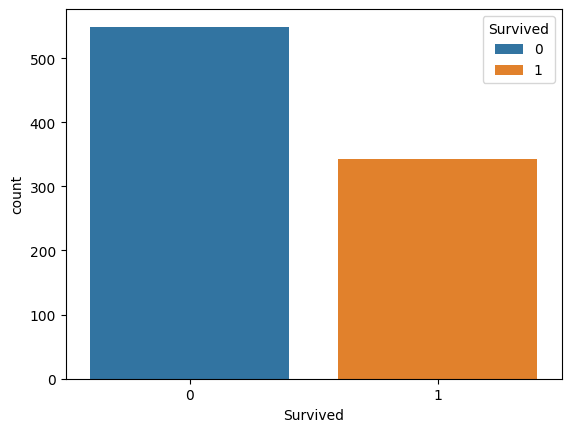

In [9]:
sns.countplot(x='Survived', hue='Survived', data=titanic)

<Axes: xlabel='Survived', ylabel='count'>

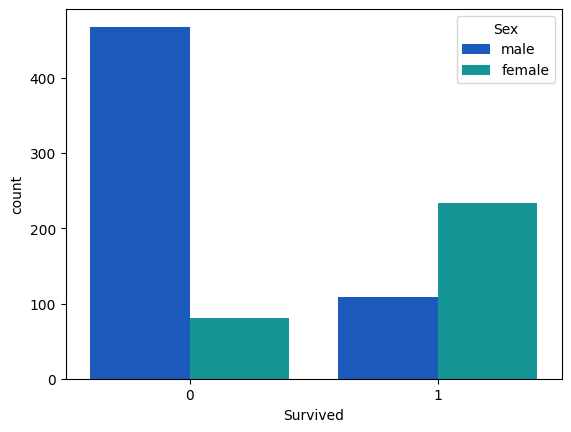

In [10]:
sns.countplot(x='Survived' , hue='Sex' , data=titanic , palette='winter')

<Axes: xlabel='Survived', ylabel='count'>

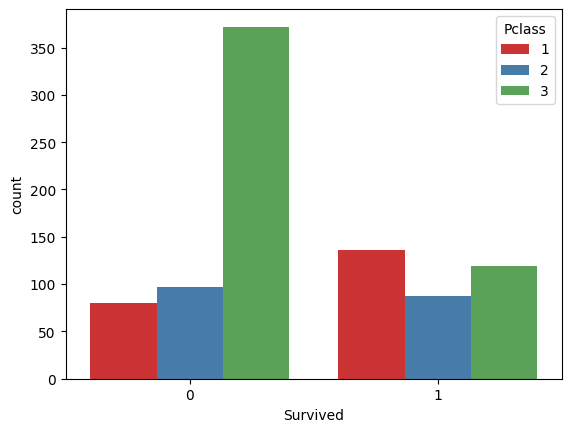

In [11]:
sns.countplot(x='Survived', hue='Pclass' , data=titanic , palette='Set1')

<Axes: ylabel='Frequency'>

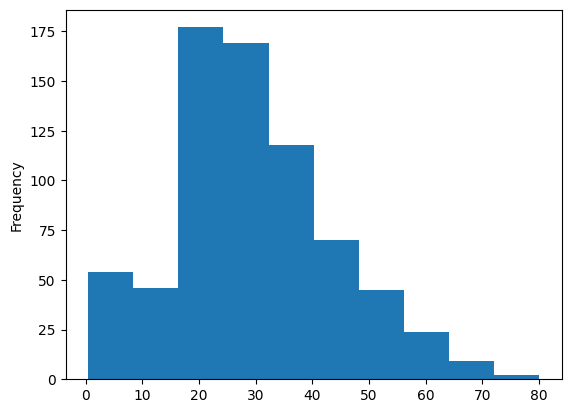

In [12]:
titanic['Age'].plot.hist()

<Axes: ylabel='Frequency'>

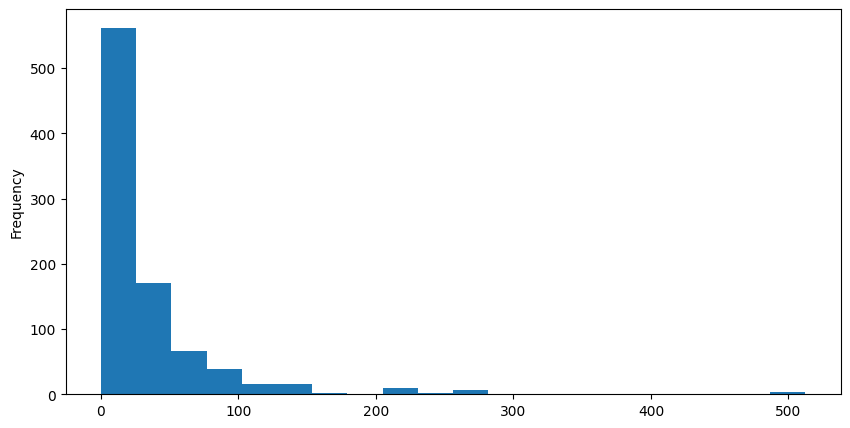

In [13]:
titanic['Fare'].plot.hist(bins=20 , figsize=(10,5))

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15344\2009823783.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp' , data=titanic , palette='rocket')


<Axes: xlabel='SibSp', ylabel='count'>

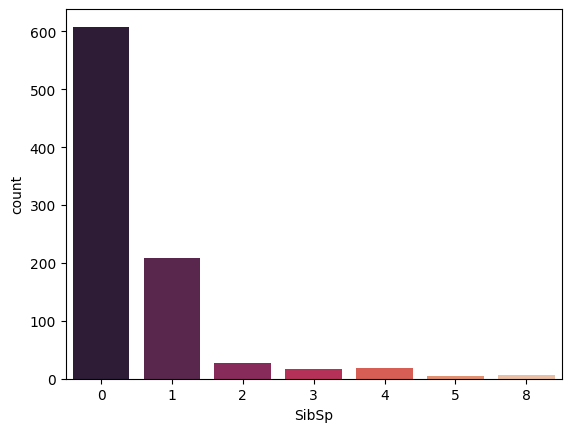

In [14]:
sns.countplot(x='SibSp' , data=titanic , palette='rocket')

<Axes: ylabel='Frequency'>

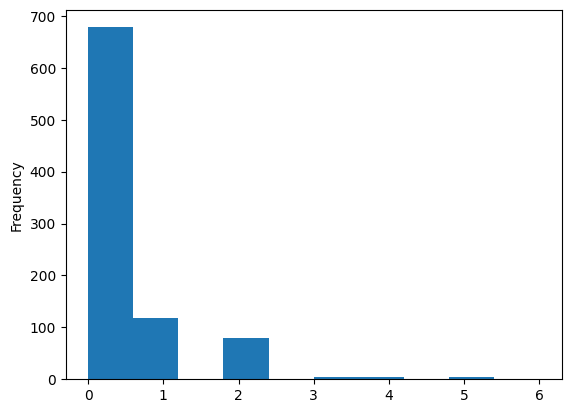

In [15]:
titanic['Parch'].plot.hist()

# Data Wrangling

In [16]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

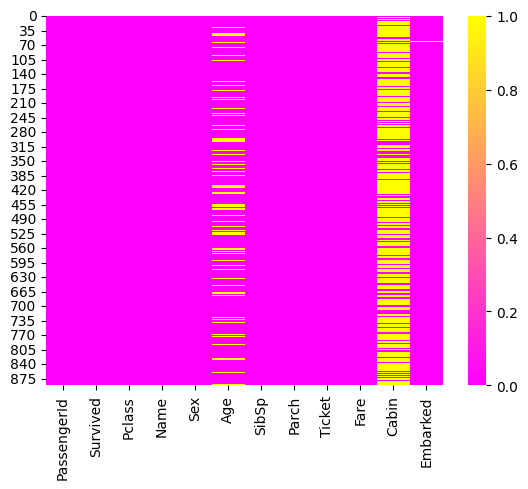

In [17]:
sns.heatmap(titanic.isnull() , cmap='spring')

<Axes: xlabel='Pclass', ylabel='Age'>

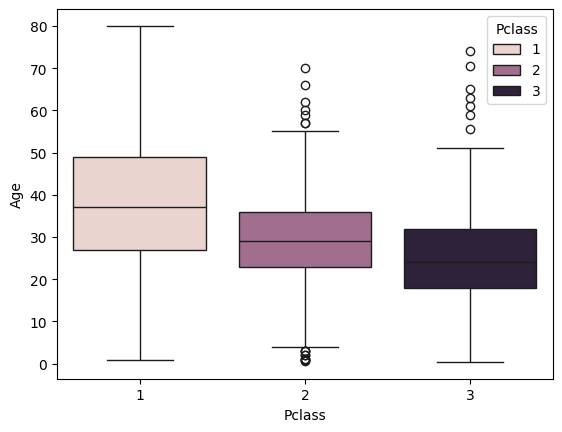

In [18]:
sns.boxplot(x='Pclass',y='Age', hue='Pclass',data=titanic)

In [19]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
titanic.drop('Cabin' , axis=1, inplace=True)

In [21]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [22]:
titanic.dropna(inplace=True)

<Axes: >

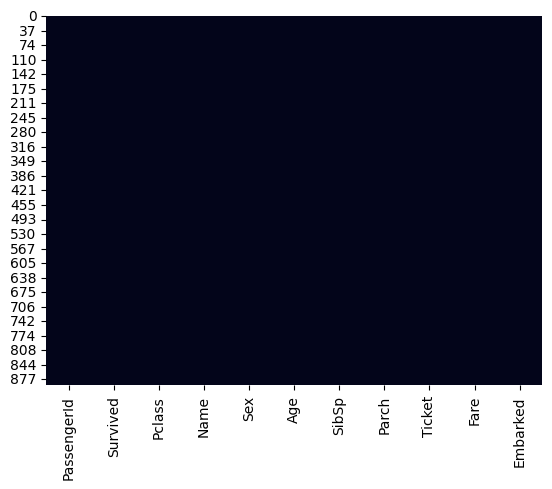

In [23]:
sns.heatmap(titanic.isnull() , cbar=False)

In [24]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [26]:
pd.get_dummies(titanic['Sex']).astype(int).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [27]:
sex=pd.get_dummies(titanic['Sex'],drop_first = True).astype(int)
sex.head(3)

,male
0,1
1,0
2,0


In [28]:
embark=pd.get_dummies(titanic['Embarked']).astype(int)
embark.head(3)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1


In [29]:
embark=pd.get_dummies(titanic['Embarked'],drop_first=True).astype(int)
embark.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


In [30]:
Pcl=pd.get_dummies(titanic['Pclass'],drop_first=True).astype(int)
Pcl.head(3)

,2,3
0,0,1
1,0,0
2,0,1


In [31]:
titanic=pd.concat([titanic,sex,embark,Pcl],axis=1)
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1


In [32]:
titanic.drop(['Name','PassengerId','Pclass','Ticket','Sex','Embarked'],axis=1,inplace=True)
titanic.head(3)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1


# Train Data

In [66]:
X=titanic.drop('Survived',axis=1)
y=titanic['Survived']

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33,random_state=4)

# Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression(max_iter=1000)

In [124]:
lm.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [132]:
predictions = lm.predict(X_test).astype(str)

In [133]:
from sklearn.metrics import classification_report

In [134]:
classification_report(y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.81      0.88      0.84       145\n           1       0.77      0.67      0.71        90\n\n    accuracy                           0.80       235\n   macro avg       0.79      0.77      0.78       235\nweighted avg       0.79      0.80      0.79       235\n'

In [128]:
from sklearn.metrics import confusion_matrix

In [129]:
confusion_matrix(y_test, prediction)

array([[127,  18],
       [ 30,  60]], dtype=int64)

In [130]:
from sklearn.metrics import accuracy_score

In [131]:
accuracy_score(y_test,prediction)

0.7957446808510639